In [1]:
#Pandas will be the backbone of our data manipulation.
import pandas as pd
from pandas.io.json import json_normalize
#Seaborn is a data visualization library.
import seaborn as sns
#Matplotlib is a data visualization library. 
#Seaborn is actually built on top of Matplotlib. 
import matplotlib.pyplot as plt
#Numpy will help us handle some work with arrays.
import numpy as np
#Datetime will allow Python to recognize dates as dates, not strings.
from datetime import datetime

In [2]:
df = pd.read_csv('activities.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 80 columns):
 #   Column                                                                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                                                                    --------------  -----  
 0   Activity ID                                                                                                                                                               1308 non-null   int64  
 1   Activity Date                                                                                                                                                             1308 non-null   object 
 2   Activity Name                                                                               

In [4]:
df['Activity Type'].value_counts()

Ride               911
Virtual Ride       245
Run                140
Yoga                 5
Weight Training      4
Walk                 2
Hike                 1
Name: Activity Type, dtype: int64

Selecting only "Ride"

In [5]:
df = df[df['Activity Type'] == 'Ride']

Selecting the features that are relevant

In [6]:
df = df[['Activity Date', 'Distance', 'Athlete Weight', 'Bike Weight', 'Moving Time', 'Max Speed', 'Average Speed', 'Elevation Gain', 'Elevation Loss', 'Elevation Low', 'Elevation High', 'Average Cadence', 'Average Heart Rate', 'Average Watts', 'Weighted Average Power', 'Wind Speed']]
df

,Activity Date,Distance,Athlete Weight,Bike Weight,Moving Time,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Average Cadence,Average Heart Rate,Average Watts,Weighted Average Power,Wind Speed
0,"May 9, 2015, 7:07:25 PM",13.39,80.0,NaN,2927.0,12.7,NaN,109.188004,NaN,778.400024,853.599976,NaN,NaN,NaN,NaN,NaN
1,"May 23, 2015, 7:29:40 PM",13.74,80.0,NaN,3843.0,12.4,NaN,106.164001,NaN,778.400024,852.900024,NaN,NaN,49.228699,NaN,NaN
2,"Jan 20, 2016, 8:45:17 PM",14.97,80.0,NaN,4648.0,9.3,NaN,127.360001,NaN,778.400024,853.900024,NaN,NaN,48.465000,NaN,NaN
3,"Jan 21, 2016, 8:21:13 PM",13.33,80.0,NaN,3341.0,14.6,NaN,112.025002,NaN,778.500000,853.700012,NaN,NaN,62.518700,NaN,NaN
4,"Jan 22, 2016, 8:33:20 PM",13.52,80.0,NaN,2665.0,13.5,NaN,111.398003,NaN,778.400024,850.099976,NaN,NaN,83.242699,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,"Sep 23, 2021, 9:17:07 PM",25.89,NaN,8.5,3600.0,11.0,7.193500,0.000000,0.0,775.000000,779.400024,81.734726,115.495552,160.108063,163.0,NaN
1304,"Sep 25, 2021, 12:04:06 PM",80.21,NaN,8.5,10032.0,18.0,7.995524,800.000000,816.0,742.599976,898.400024,80.780617,135.690186,158.168060,169.0,3.75
1305,"Sep 26, 2021, 2:08:31 PM",43.34,NaN,8.5,5419.0,15.2,7.998007,229.000000,224.0,803.200012,841.599976,83.144585,128.509323,161.173279,165.0,3.92
1306,"Sep 28, 2021, 10:09:07 AM",43.34,NaN,8.5,5752.0,13.2,7.535014,208.000000,210.0,803.000000,833.799988,80.088715,130.684631,168.662201,189.0,3.50


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 911 entries, 0 to 1307
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Activity Date           911 non-null    object 
 1   Distance                911 non-null    float64
 2   Athlete Weight          688 non-null    float64
 3   Bike Weight             850 non-null    float64
 4   Moving Time             911 non-null    float64
 5   Max Speed               911 non-null    float64
 6   Average Speed           308 non-null    float64
 7   Elevation Gain          868 non-null    float64
 8   Elevation Loss          563 non-null    float64
 9   Elevation Low           878 non-null    float64
 10  Elevation High          878 non-null    float64
 11  Average Cadence         790 non-null    float64
 12  Average Heart Rate      780 non-null    float64
 13  Average Watts           910 non-null    float64
 14  Weighted Average Power  516 non-null    f

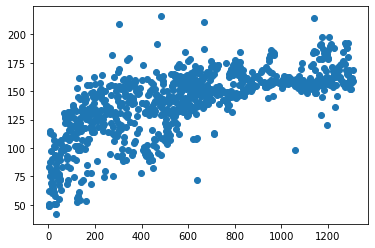

In [8]:
plt.scatter(y=df['Average Watts'], x=df.index)
plt.show()

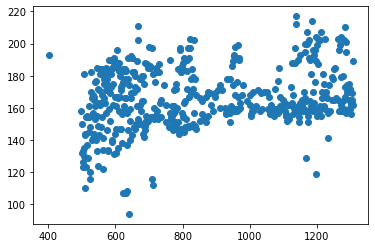

In [9]:
plt.scatter(y=df['Weighted Average Power'], x=df.index)
plt.show()

In [10]:
df['Weighted Average Power'].value_counts

<bound method IndexOpsMixin.value_counts of 0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
1303    163.0
1304    169.0
1305    165.0
1306    189.0
1307    162.0
Name: Weighted Average Power, Length: 911, dtype: float64>

Comparing "Average Watts" and "Weighted Average Power", we notice that the first ~500 activities were with estimated power, so those should be dropped

In [11]:
df = df.dropna(subset=['Weighted Average Power'])
df

,Activity Date,Distance,Athlete Weight,Bike Weight,Moving Time,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Average Cadence,Average Heart Rate,Average Watts,Weighted Average Power,Wind Speed
401,"Aug 2, 2018, 10:07:41 PM",28.79,70.0,7.5,3599.0,12.3,NaN,0.0,NaN,NaN,NaN,87.418564,128.630737,160.117538,193.0,NaN
499,"Dec 20, 2018, 9:21:47 PM",28.50,70.0,7.5,3649.0,16.1,NaN,189.0,196.0,774.400024,837.000000,81.804916,136.374344,141.124146,158.0,NaN
500,"Dec 21, 2018, 11:44:34 AM",60.17,70.0,7.5,7936.0,16.4,NaN,564.0,577.0,712.799988,870.000000,84.583115,144.088074,130.858368,150.0,NaN
502,"Dec 27, 2018, 12:11:00 PM",102.46,70.0,7.5,13926.0,17.5,NaN,1056.0,1034.0,708.799988,879.400024,82.143440,133.484985,121.892433,132.0,NaN
503,"Dec 28, 2018, 8:00:09 AM",151.54,70.0,7.5,22486.0,20.6,NaN,1809.0,1827.0,465.600006,872.400024,80.559204,124.585190,105.306503,126.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,"Sep 23, 2021, 9:17:07 PM",25.89,NaN,8.5,3600.0,11.0,7.193500,0.0,0.0,775.000000,779.400024,81.734726,115.495552,160.108063,163.0,NaN
1304,"Sep 25, 2021, 12:04:06 PM",80.21,NaN,8.5,10032.0,18.0,7.995524,800.0,816.0,742.599976,898.400024,80.780617,135.690186,158.168060,169.0,3.75
1305,"Sep 26, 2021, 2:08:31 PM",43.34,NaN,8.5,5419.0,15.2,7.998007,229.0,224.0,803.200012,841.599976,83.144585,128.509323,161.173279,165.0,3.92
1306,"Sep 28, 2021, 10:09:07 AM",43.34,NaN,8.5,5752.0,13.2,7.535014,208.0,210.0,803.000000,833.799988,80.088715,130.684631,168.662201,189.0,3.50


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516 entries, 401 to 1307
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Activity Date           516 non-null    object 
 1   Distance                516 non-null    float64
 2   Athlete Weight          293 non-null    float64
 3   Bike Weight             515 non-null    float64
 4   Moving Time             516 non-null    float64
 5   Max Speed               516 non-null    float64
 6   Average Speed           308 non-null    float64
 7   Elevation Gain          473 non-null    float64
 8   Elevation Loss          478 non-null    float64
 9   Elevation Low           483 non-null    float64
 10  Elevation High          483 non-null    float64
 11  Average Cadence         516 non-null    float64
 12  Average Heart Rate      496 non-null    float64
 13  Average Watts           516 non-null    float64
 14  Weighted Average Power  516 non-null   

Now we should check every feature that have null values in order to fix them

In [13]:
df['Athlete Weight'].value_counts()

67.0    192
70.0    101
Name: Athlete Weight, dtype: int64

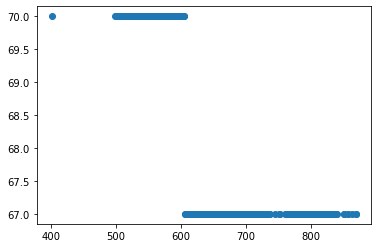

In [14]:
plt.scatter(y=df['Athlete Weight'], x=df.index)
plt.show()

In [15]:
df['Athlete Weight'] = df['Athlete Weight'].fillna(df['Athlete Weight'].mode()[0])

<ipython-input-15-619230eb946b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Athlete Weight'] = df['Athlete Weight'].fillna(df['Athlete Weight'].mode()[0])


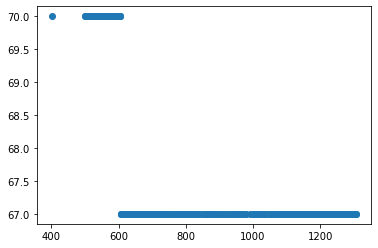

In [16]:
plt.scatter(y=df['Athlete Weight'], x=df.index)
plt.show()

The bike weight that is lacking (just one) is between two 8.5kg, so i'll fulfill it with this value

In [17]:
df['Bike Weight'] = df['Bike Weight'].fillna(8.5)

<ipython-input-17-c01e764875d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bike Weight'] = df['Bike Weight'].fillna(8.5)


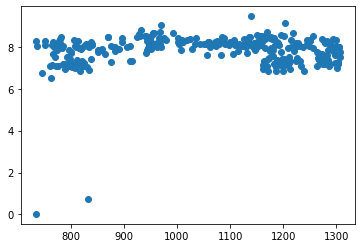

In [18]:
plt.scatter(y=df['Average Speed'], x=df.index)
plt.show()

In [19]:
df = df.drop(columns = ['Average Speed'])

activities that doesn't have "Elevation Gain" and "Elevation Loss" are indoor activities so they should be dropped.

indoor average speed are meaningless

In [20]:
df = df.dropna(subset=['Elevation Gain'])
df = df.dropna(subset=['Elevation Loss'])
df= df[df['Elevation Gain'] != 0.0]
df= df[df['Elevation Loss'] != 0.0]
df

,Activity Date,Distance,Athlete Weight,Bike Weight,Moving Time,Max Speed,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Average Cadence,Average Heart Rate,Average Watts,Weighted Average Power,Wind Speed
499,"Dec 20, 2018, 9:21:47 PM",28.50,70.0,7.5,3649.0,16.100000,189.0,196.0,774.400024,837.000000,81.804916,136.374344,141.124146,158.0,NaN
500,"Dec 21, 2018, 11:44:34 AM",60.17,70.0,7.5,7936.0,16.400000,564.0,577.0,712.799988,870.000000,84.583115,144.088074,130.858368,150.0,NaN
502,"Dec 27, 2018, 12:11:00 PM",102.46,70.0,7.5,13926.0,17.500000,1056.0,1034.0,708.799988,879.400024,82.143440,133.484985,121.892433,132.0,NaN
503,"Dec 28, 2018, 8:00:09 AM",151.54,70.0,7.5,22486.0,20.600000,1809.0,1827.0,465.600006,872.400024,80.559204,124.585190,105.306503,126.0,NaN
504,"Dec 29, 2018, 10:21:38 AM",79.98,70.0,7.5,11130.0,19.299999,816.0,812.0,641.599976,872.799988,79.305138,129.399734,114.944656,133.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,"Sep 19, 2021, 6:52:30 PM",64.91,67.0,8.5,7777.0,15.100000,463.0,507.0,794.599976,865.200012,82.040230,144.109299,152.081268,156.0,1.51
1304,"Sep 25, 2021, 12:04:06 PM",80.21,67.0,8.5,10032.0,18.000000,800.0,816.0,742.599976,898.400024,80.780617,135.690186,158.168060,169.0,3.75
1305,"Sep 26, 2021, 2:08:31 PM",43.34,67.0,8.5,5419.0,15.200000,229.0,224.0,803.200012,841.599976,83.144585,128.509323,161.173279,165.0,3.92
1306,"Sep 28, 2021, 10:09:07 AM",43.34,67.0,8.5,5752.0,13.200000,208.0,210.0,803.000000,833.799988,80.088715,130.684631,168.662201,189.0,3.50


There was an empty Heart Rate that is fullfiled with the mean

In [21]:
df['Average Heart Rate'] = df['Average Heart Rate'].fillna((df['Average Heart Rate'].mean()))

Transforming the max speed and wind speed from meters per second to kilometers per hour

In [22]:
df['Max Speed'] = df['Max Speed'] * 3.6
df['Wind Speed'] = df['Wind Speed'] * 3.6

It's better to sum the bike weight to rider weight in order to reduce one feature

In [23]:
df['Total Weight'] = df['Athlete Weight'] + df['Bike Weight']
df = df.drop(columns = ['Athlete Weight', 'Bike Weight'])

transforming the date into datetime

In [24]:
df['Activity Date'] = pd.to_datetime(df['Activity Date'])

average grade is a percentage of elevation gain divided by the distance

In [25]:
df['Average Grade'] = df['Elevation Gain'] /  (df['Distance'] * 10)

The average speed for some reason just started to show after the activity #734.

Luckily, we can calculate that. 

It's the "Distance" (measured in kilometers) divided by the "Moving Time" (measured in seconds).

In [26]:
df['Average Speed'] = (df['Distance'] * 60 * 60) / df['Moving Time']
df['Average Speed']

499     28.117292
500     27.294859
502     26.486859
503     24.261496
504     25.869542
          ...    
1300    30.047062
1304    28.783493
1305    28.792028
1306    27.125174
1307    27.876362
Name: Average Speed, Length: 332, dtype: float64

There was 2 rows that were indoor activities. They shall be dropped

In [27]:
df = df.drop([1169, 1225])
df

,Activity Date,Distance,Moving Time,Max Speed,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Average Cadence,Average Heart Rate,Average Watts,Weighted Average Power,Wind Speed,Total Weight,Average Grade,Average Speed
499,2018-12-20 21:21:47,28.50,3649.0,57.960001,189.0,196.0,774.400024,837.000000,81.804916,136.374344,141.124146,158.0,NaN,77.5,0.663158,28.117292
500,2018-12-21 11:44:34,60.17,7936.0,59.039999,564.0,577.0,712.799988,870.000000,84.583115,144.088074,130.858368,150.0,NaN,77.5,0.937344,27.294859
502,2018-12-27 12:11:00,102.46,13926.0,63.000000,1056.0,1034.0,708.799988,879.400024,82.143440,133.484985,121.892433,132.0,NaN,77.5,1.030646,26.486859
503,2018-12-28 08:00:09,151.54,22486.0,74.160001,1809.0,1827.0,465.600006,872.400024,80.559204,124.585190,105.306503,126.0,NaN,77.5,1.193744,24.261496
504,2018-12-29 10:21:38,79.98,11130.0,69.479997,816.0,812.0,641.599976,872.799988,79.305138,129.399734,114.944656,133.0,NaN,77.5,1.020255,25.869542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,2021-09-19 18:52:30,64.91,7777.0,54.360001,463.0,507.0,794.599976,865.200012,82.040230,144.109299,152.081268,156.0,5.436,75.5,0.713295,30.047062
1304,2021-09-25 12:04:06,80.21,10032.0,64.800000,800.0,816.0,742.599976,898.400024,80.780617,135.690186,158.168060,169.0,13.500,75.5,0.997382,28.783493
1305,2021-09-26 14:08:31,43.34,5419.0,54.719999,229.0,224.0,803.200012,841.599976,83.144585,128.509323,161.173279,165.0,14.112,75.5,0.528380,28.792028
1306,2021-09-28 10:09:07,43.34,5752.0,47.519999,208.0,210.0,803.000000,833.799988,80.088715,130.684631,168.662201,189.0,12.600,75.5,0.479926,27.125174


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 499 to 1307
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Activity Date           330 non-null    datetime64[ns]
 1   Distance                330 non-null    float64       
 2   Moving Time             330 non-null    float64       
 3   Max Speed               330 non-null    float64       
 4   Elevation Gain          330 non-null    float64       
 5   Elevation Loss          330 non-null    float64       
 6   Elevation Low           330 non-null    float64       
 7   Elevation High          330 non-null    float64       
 8   Average Cadence         330 non-null    float64       
 9   Average Heart Rate      330 non-null    float64       
 10  Average Watts           330 non-null    float64       
 11  Weighted Average Power  330 non-null    float64       
 12  Wind Speed              193 non-null    float64

In [29]:
df.to_csv('clean_values.csv', index=False)